In [22]:
import pandas as pd
import spacy
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
df = pd.read_excel("./Data/Sentiment_Analysis.xlsx")

In [3]:
df.head()

,Review_ID,Customer_ID,Review_text,Sentiment_label,Rating,Policy_type
0,1001,C2345,I had a terrible experience filing my auto cla...,Negative,1,Claim
1,1002,C3421,The customer support team was very responsive ...,Positive,5,Support
2,1003,C1078,My health insurance policy processing was aver...,Neutral,3,Policy Purchase
3,1004,C4556,Very disappointed with how my home insurance c...,Negative,1,Claim
4,1005,C2213,The online portal for managing my policy is us...,Positive,5,Support


In [4]:
df.shape

(565, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_ID        565 non-null    int64 
 1   Customer_ID      565 non-null    object
 2   Review_text      565 non-null    object
 3   Sentiment_label  565 non-null    object
 4   Rating           565 non-null    int64 
 5   Policy_type      565 non-null    object
dtypes: int64(2), object(4)
memory usage: 26.6+ KB


In [6]:
df['Sentiment_label'].value_counts()

Sentiment_label
Positive    233
Negative    191
Neutral     141
Name: count, dtype: int64

In [7]:
# - From the above, we can see that almost the Sentiment(classes) occured equal number of times and balanced. 
# There is **no problem of class imbalance** and hence no need to apply any balancing techniques like SMOTE.

In [8]:
#Add the new column "Sentiment_label" which gives a unique number to each of these Emotions

df['Sentiment_num'] = df['Sentiment_label'].map({'Negative' : 0, 'Neutral': 1, 'Positive': 2})

#checking the results 
df.head(5)

,Review_ID,Customer_ID,Review_text,Sentiment_label,Rating,Policy_type,Sentiment_num
0,1001,C2345,I had a terrible experience filing my auto cla...,Negative,1,Claim,0
1,1002,C3421,The customer support team was very responsive ...,Positive,5,Support,2
2,1003,C1078,My health insurance policy processing was aver...,Neutral,3,Policy Purchase,1
3,1004,C4556,Very disappointed with how my home insurance c...,Negative,1,Claim,0
4,1005,C2213,The online portal for managing my policy is us...,Positive,5,Support,2


# Data Preprocessing

In [9]:
import spacy

In [10]:
import en_core_web_sm

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

#use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [11]:
# create a new column "preprocessed_comment" and use the utility function above to get the clean data
# this will take some time, please be patient
df['preprocessed_review'] = df['Review_text'].apply(preprocess) 

In [12]:
df.head(1)

,Review_ID,Customer_ID,Review_text,Sentiment_label,Rating,Policy_type,Sentiment_num,preprocessed_review
0,1001,C2345,I had a terrible experience filing my auto cla...,Negative,1,Claim,0,terrible experience file auto claim take 3 wee...


# Build a Tfidf model with preprocessed customer review

In [13]:
#'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Use the preprocessed_Comment
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_review, 
    df.Sentiment_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Sentiment_num
)

1. using the sklearn pipeline module create a classification pipeline to classify the data.

**Note:**
- using **TF-IDF vectorizer** for pre-processing the text.
- use **RandomForest** and **LogisticRegression** as the classifier.
- print the classification report.

In [14]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),      
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.93      0.89      0.91        28
           2       0.85      0.94      0.89        47

    accuracy                           0.90       113
   macro avg       0.91      0.90      0.90       113
weighted avg       0.91      0.90      0.90       113



In [15]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),      
     ('Multi NB', LogisticRegression())             
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.89      0.93        38
           1       1.00      0.82      0.90        28
           2       0.85      1.00      0.92        47

    accuracy                           0.92       113
   macro avg       0.94      0.91      0.92       113
weighted avg       0.93      0.92      0.92       113



### Confusion Matrix - Tfidf - Logistic Regression

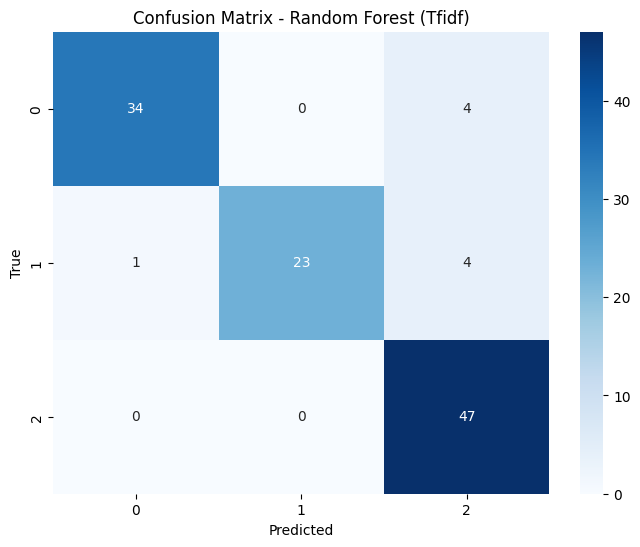

In [16]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest (Tfidf)')
plt.show()

# BERT Word Embedding

In [38]:
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize all text entries
inputs = tokenizer(
    df['preprocessed_review'].tolist(),
    padding=True,
    truncation=True,
    return_tensors="pt"
)


In [39]:
labels = torch.tensor(df["Sentiment_num"].tolist())

In [40]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import AdamW

# Combine input tensors into a dataset
dataset = TensorDataset(inputs["input_ids"], inputs["attention_mask"], labels)
loader = DataLoader(dataset, batch_size=3, shuffle=True)

optimizer = AdamW(model.parameters(), lr=5e-5)

model.train()
for epoch in range(3):
    for batch in loader:
        input_ids, attention_mask, label_batch = batch

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=label_batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.3631
Epoch 2, Loss: 0.1928
Epoch 3, Loss: 0.0700


In [43]:
model.eval()
with torch.no_grad():
    test_texts = ["I hate this", "Best purchase ever"]
    test_inputs = tokenizer(test_texts, padding=True, truncation=True, return_tensors="pt")
    outputs = model(**test_inputs)
    preds = torch.argmax(outputs.logits, dim=1)
    print(preds)  # Output: tensor([0, 1])

tensor([0, 1])


In [45]:
# Accuracy

from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['preprocessed_review'], df['Sentiment_num'], test_size=0.2)


In [47]:
# Tokenize test data
test_inputs = tokenizer(test_texts.tolist(), padding=True, truncation=True, return_tensors="pt")

# Convert labels to tensor
test_labels = torch.tensor(test_labels.tolist(), dtype=torch.long)


In [48]:
from sklearn.metrics import accuracy_score

# Set the model to evaluation mode
model.eval()

# Get predictions for the test set
with torch.no_grad():
    outputs = model(**test_inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9735


In [49]:
print(classification_report(test_labels, predictions, target_names=["Negative", "Neutral", "Positive"]))

              precision    recall  f1-score   support

    Negative       1.00      0.97      0.99        37
     Neutral       0.91      1.00      0.96        32
    Positive       1.00      0.95      0.98        44

    accuracy                           0.97       113
   macro avg       0.97      0.98      0.97       113
weighted avg       0.98      0.97      0.97       113



In [44]:
# Save model and tokenizer
model.save_pretrained("saved_bert_model/")
tokenizer.save_pretrained("saved_bert_model/")

('saved_bert_model/tokenizer_config.json',
 'saved_bert_model/special_tokens_map.json',
 'saved_bert_model/vocab.txt',
 'saved_bert_model/added_tokens.json',
 'saved_bert_model/tokenizer.json')